### Data preprocessing and EDA analysis of the data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Reviews.csv')
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [3]:
df.columns

Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text'],
      dtype='object')

The "helpfulness numerator" represents the number of users who found the review helpful. It indicates how many people rated the review positively or agreed that it provided valuable information.<br>
The "helpfulness denominator" represents the total number of users who have rated the review, whether they found it helpful or not. It includes both positive and negative ratings or the total number of people who have expressed an opinion on the review's helpfulness.

In [4]:
#get helpfullness percentage
df['Helpfull%'] = np.where(df['HelpfulnessDenominator']>0,df['HelpfulnessNumerator']/df['HelpfulnessDenominator'],-1)
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Helpfull%
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,1.0
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,-1.0
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,1.0
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,1.0
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,-1.0


In [5]:
#Show unique helpfullness percentages
df['Helpfull%'].unique()

array([ 1.        , -1.        ,  0.8       ,  0.        ,  0.5       ,
        0.66666667,  0.25      ,  0.89473684,  0.83333333,  0.75      ,
        0.33333333,  0.3       ,  0.11111111,  0.42857143,  0.875     ,
        0.85714286,  0.2       ,  0.26315789,  0.6       ,  0.71428571,
        0.53846154,  0.57142857,  0.91489362,  0.86666667,  0.82352941,
        0.78571429,  0.74074074,  0.4       ,  0.375     ,  0.28571429,
        0.14285714,  0.77777778,  0.125     ,  0.9       ,  0.94117647,
        0.92307692,  0.7       ,  0.45454545,  0.88888889,  0.83870968,
        0.9047619 ,  0.92857143,  0.90909091,  0.91666667,  0.84615385,
        0.10526316,  0.98214286,  0.97826087,  0.7518797 ,  0.3125    ,
        0.1       ,  0.18518519,  0.88      ,  0.69230769,  0.625     ,
        0.54545455,  0.41666667,  0.45833333,  0.22222222,  0.81818182,
        0.8125    ,  0.16666667,  0.93103448,  0.88235294,  0.23529412,
        0.63636364,  0.81481481,  0.95652174,  0.64285714,  0.58

In [6]:
#discretization of helpfullness percentages based on the specific bins
df['%upvote'] = pd.cut(df['Helpfull%'],bins = [-1,0,0.2,0.4,0.6,0.8,1],labels=['Empty','0-20%','20-40%','40-60%','60-80%','80-100%'])
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Helpfull%,%upvote
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,1.0,80-100%
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,-1.0,NaN
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,1.0,80-100%
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,1.0,80-100%
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,-1.0,NaN


In [7]:
#However Empty indicates 0% helpfulness, NaN indicates the columns which have not any positive or negative vote
df[df['%upvote'] == "Empty"]

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Helpfull%,%upvote
26,27,B001GVISJM,A3RXAU2N8KV45G,lady21,0,1,1,1332633600,Nasty No flavor,"The candy is just red , No flavor . Just plan...",0.0,Empty
27,28,B001GVISJM,AAAS38B98HMIK,Heather Dube,0,1,4,1331856000,Great Bargain for the Price,I was so glad Amazon carried these batteries. ...,0.0,Empty
31,32,B003F6UO7K,A31OQO709M20Y7,"Molly V. Smith ""staral""",0,1,5,1288310400,THIS IS MY TASTE...,"This offer is a great price and a great taste,...",0.0,Empty
49,50,B001EO5QW8,A276999Y6VRSCQ,JMay,0,1,3,1334016000,Same stuff,This is the same stuff you can buy at the big ...,0.0,Empty
50,51,B001EO5QW8,A108P30XVUFKXY,Roberto A,0,7,1,1203379200,Don't like it,"This oatmeal is not good. Its mushy, soft, I d...",0.0,Empty
...,...,...,...,...,...,...,...,...,...,...,...,...
568354,568355,B003O5Q3KE,A2Q833MV8UEM37,Josh Crick,0,2,1,1286841600,My Dog HATED these treats,Went into the dumpster the very first night. M...,0.0,Empty
568384,568385,B000H28ABW,A8T6W1M15FM75,"CA-SK ""CLA""",0,3,2,1255219200,Bland Taco Seasoning,"Tasteless, bland, insipid - how many synonyms ...",0.0,Empty
568403,568404,B001EQ5O6Y,A2891E3BMAKGYN,"PCNiles ""reader/writer""",0,6,2,1264118400,"Deceptive Term = ""Sticks""","When I ordered these, based on the description...",0.0,Empty
568435,568436,B003XUL27E,A2PSB4WQHH46HN,carlyowu,0,2,2,1285718400,Where's the tortellini?,"It is mostly broth, with the advertised 3/4 cu...",0.0,Empty


In [8]:
#Group and agregating data based on score and upvote percentages
df.groupby(['Score','%upvote']).agg('count')

Id  ProductId  UserId  ProfileName  HelpfulnessNumerator  \
Score %upvote                                                                 
1     Empty      8060       8060    8060         8060                  8060   
      0-20%      2338       2338    2338         2338                  2338   
      20-40%     4649       4649    4649         4649                  4649   
      40-60%     6586       6586    6586         6586                  6586   
      60-80%     5838       5838    5838         5836                  5838   
      80-100%   12531      12531   12531        12531                 12531   
2     Empty      4234       4234    4234         4234                  4234   
      0-20%       762        762     762          762                   762   
      20-40%     1618       1618    1618         1618                  1618   
      40-60%     3051       3051    3051         3051                  3051   
      60-80%     2486       2486    2486         2486                  2486   
      80-100%    7014       7014    7014         7014                  7014   
3     Empty      5062       5062    5062         5062                  5062   
      0-20%       474        474     474          474                   474   
      20-40%     1506       1506    1506         1506                  1506   
      40-60%     3384       3384    3384         3384                  3384   
      60-80%     2754       2754    2754         2754                  2754   
      80-100%   11037      11037   11037        11037                 11037   
4     Empty      4780       4780    4780         4780                  4780   
      0-20%       116        116     116          116                   116   
      20-40%      909        909     909          909                   909   
      40-60%     3185       3185    3185         3185                  3185   
      60-80%     2941       2941    2941         2941                  2941   
      80-100%   26707      26707   26707        26707                 26707   
5     Empty     11638      11638   11638        11638                 11638   
      0-20%       432        432     432          432                   432   
      20-40%     2275       2275    2275         2275                  2275   
      40-60%    10312      10312   10312        10312                 10312   
      60-80%    11060      11060   11060        11060                 11060   
      80-100%  140661     140661  140661       140659                140661   

               HelpfulnessDenominator    Time  Summary    Text  Helpfull%  
Score %upvote                                                              
1     Empty                      8060    8060     8060    8060       8060  
      0-20%                      2338    2338     2338    2338       2338  
      20-40%                     4649    4649     4649    4649       4649  
      40-60%                     6586    6586     6586    6586       6586  
      60-80%                     5838    5838     5838    5838       5838  
      80-100%                   12531   12531    12531   12531      12531  
2     Empty                      4234    4234     4234    4234       4234  
      0-20%                       762     762      737     762        762  
      20-40%                     1618    1618     1618    1618       1618  
      40-60%                     3051    3051     3051    3051       3051  
      60-80%                     2486    2486     2486    2486       2486  
      80-100%                    7014    7014     7014    7014       7014  
3     Empty                      5062    5062     5062    5062       5062  
      0-20%                       474     474      474     474        474  
      20-40%                     1506    1506     1506    1506       1506  
      40-60%                     3384    3384     3384    3384       3384  
      60-80%                     2754    2754     2754    2754       2754  
      80-100%                   11037   11037 

In [9]:
#Simplification of agregation by selecting one column named Id
df.groupby(['Score','%upvote']).agg({'Id':'count'})

Id
Score %upvote        
1     Empty      8060
      0-20%      2338
      20-40%     4649
      40-60%     6586
      60-80%     5838
      80-100%   12531
2     Empty      4234
      0-20%       762
      20-40%     1618
      40-60%     3051
      60-80%     2486
      80-100%    7014
3     Empty      5062
      0-20%       474
      20-40%     1506
      40-60%     3384
      60-80%     2754
      80-100%   11037
4     Empty      4780
      0-20%       116
      20-40%      909
      40-60%     3185
      60-80%     2941
      80-100%   26707
5     Empty     11638
      0-20%       432
      20-40%     2275
      40-60%    10312
      60-80%    11060
      80-100%  140661

In [10]:
#saving the last dataframe in compatible pandas dataframe format
df_s = df.groupby(['Score','%upvote']).agg({'Id':'count'}).reset_index()
df_s

,Score,%upvote,Id
0,1,Empty,8060
1,1,0-20%,2338
2,1,20-40%,4649
3,1,40-60%,6586
4,1,60-80%,5838
5,1,80-100%,12531
6,2,Empty,4234
7,2,0-20%,762
8,2,20-40%,1618
9,2,40-60%,3051


In [11]:
#creating a pivot table to show in more visible way
pivot = df_s.pivot(index='%upvote',columns='Score')
pivot

Id                            
Score        1     2      3      4       5
%upvote                                   
Empty     8060  4234   5062   4780   11638
0-20%     2338   762    474    116     432
20-40%    4649  1618   1506    909    2275
40-60%    6586  3051   3384   3185   10312
60-80%    5838  2486   2754   2941   11060
80-100%  12531  7014  11037  26707  140661

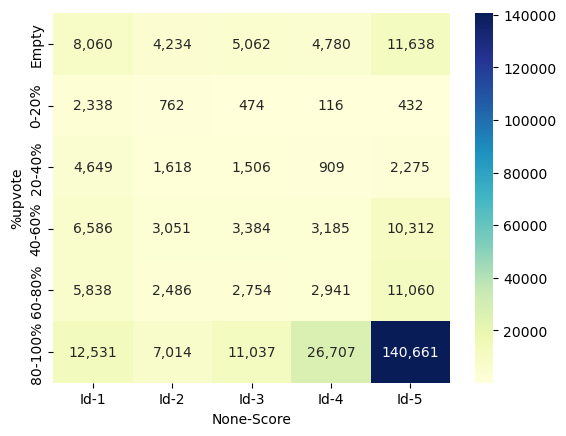

In [12]:
#creating a heatmap to show this pivot in order view data cumulation
sns.heatmap(data = pivot, annot = True, cmap = 'YlGnBu',fmt=',.0f');

In [13]:
df['Score'].unique()

array([5, 1, 4, 2, 3], dtype=int64)

#### Applying bag of words

In [14]:
#deleting columns have 3 score which means no sentiment or neutral sentiment. 
#We need only 4-5 scores which mean positive sentiment and 1-2 scores which mean negative sentiment
df2 = df[df['Score']!=3]
df2

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Helpfull%,%upvote
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,1.0,80-100%
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,-1.0,NaN
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,1.0,80-100%
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,1.0,80-100%
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,-1.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
568449,568450,B001EO7N10,A28KG5XORO54AY,Lettie D. Carter,0,0,5,1299628800,Will not do without,Great for sesame chicken..this is a good if no...,-1.0,NaN
568450,568451,B003S1WTCU,A3I8AFVPEE8KI5,R. Sawyer,0,0,2,1331251200,disappointed,I'm disappointed with the flavor. The chocolat...,-1.0,NaN
568451,568452,B004I613EE,A121AA1GQV751Z,"pksd ""pk_007""",2,2,5,1329782400,Perfect for our maltipoo,"These stars are small, so you can give 10-15 o...",1.0,80-100%
568452,568453,B004I613EE,A3IBEVCTXKNOH,"Kathy A. Welch ""katwel""",1,1,5,1331596800,Favorite Training and reward treat,These are the BEST treats for training and rew...,1.0,80-100%


In [15]:
#creating dependent and independent variables. Independent variable is text columns because of sentiment analysis
X = df2['Text']
X

0         I have bought several of the Vitality canned d...
1         Product arrived labeled as Jumbo Salted Peanut...
2         This is a confection that has been around a fe...
3         If you are looking for the secret ingredient i...
4         Great taffy at a great price.  There was a wid...
                                ...                        
568449    Great for sesame chicken..this is a good if no...
568450    I'm disappointed with the flavor. The chocolat...
568451    These stars are small, so you can give 10-15 o...
568452    These are the BEST treats for training and rew...
568453    I am very satisfied ,product is as advertised,...
Name: Text, Length: 525814, dtype: object

In [16]:
#creating a dictionary to apply the dataframe to differ positive and negative scores which will be classified 
y_dict = {1:0,2:0,4:1,5:1}
y = df2['Score'].map(y_dict)
y

0         1
1         0
2         1
3         0
4         1
         ..
568449    1
568450    0
568451    1
568452    1
568453    1
Name: Score, Length: 525814, dtype: int64

In [17]:
#creating vector which contains count of the words in each text
from sklearn.feature_extraction.text import CountVectorizer
#stop_words parameter is used to define word list which will be ignored in vectorizing process
#For example:"a," "an," "the," "in," "is," etc is ignored in english option
count_matrix = CountVectorizer(stop_words='english')

In [18]:
#Vectorize our text data
X_count = count_matrix.fit_transform(X)

In [19]:
X_count.shape

(525814, 114969)

In [20]:
# Splitting the data into train and test datasets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_count,y)

In [21]:
X_train.shape

(394360, 114969)

In [22]:
#Creating Logistic regression model to predictions
from sklearn.linear_model import LogisticRegression
model = LogisticRegression().fit(X_train,y_train)

C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [23]:
#getting accuracy score of model over test set
model.score(X_test,y_test)

0.9343572656594702

##### Getting coefficients of the words

In [24]:
words = count_matrix.get_feature_names_out()
words

array(['00', '000', '0000', ..., 'être', 'île', 'ît'], dtype=object)

In [25]:
coefficients = model.coef_.tolist()[0]
coefficients

[-0.42957661304851413,
 -0.007970660984773215,
 0.36425099548748724,
 -0.006896605420465571,
 -0.00820275941760302,
 0.0,
 0.0003071409425778059,
 -0.006849512016710014,
 0.00033384162929450114,
 0.0,
 0.0019349609089159235,
 -0.013835415765755124,
 0.0017796364606511585,
 0.010348868827078013,
 -0.27067851413927446,
 0.0036226819803949427,
 0.0019274157622406894,
 0.003264814095319455,
 0.0012257992377680096,
 5.165687205671398e-05,
 0.07824657498241755,
 0.015237290671529473,
 0.03789496880487058,
 0.03789496880487058,
 0.03789496880487058,
 0.03789496880487058,
 0.03789496880487058,
 0.03789496880487058,
 0.03789496880487058,
 0.03789496880487058,
 0.03789496880487058,
 0.0,
 0.06334202762909415,
 0.00010422979312556434,
 -0.08527207711036035,
 -0.0004860633821184631,
 0.0,
 0.0,
 0.041922054315740795,
 1.9165474804613128e-05,
 -0.11463338839578728,
 0.01206736407886388,
 9.163151743680458e-05,
 0.007739714556259156,
 0.0,
 9.450426919462314e-05,
 0.009772419871736271,
 6.4884479893

In [26]:
coefficient_dataframe = pd.DataFrame({"Word":words,"Coefficients":coefficients})
coefficient_dataframe

,Word,Coefficients
0,00,-0.429577
1,000,-0.007971
2,0000,0.364251
3,000001,-0.006897
4,00001,-0.008203
...,...,...
114964,çaykur,0.000759
114965,çelem,0.000000
114966,être,0.017835
114967,île,0.009693


In [27]:
#Getting top 20 positive words
sorted_df = coefficient_dataframe.sort_values(['Coefficients','Word'], ascending=False)
top_20_positive =sorted_df.head(20)

In [28]:
#Getting top 20 negative words
top_20_negative = sorted_df.tail(20)
top_20_negative

,Word,Coefficients
94747,skip,-2.234724
21288,blech,-2.235030
65064,lousy,-2.263293
46083,flavorless,-2.282443
107494,unfinished,-2.295814
76576,overpowers,-2.314193
89864,ruined,-2.314471
41118,embarrassed,-2.362396
35220,defeats,-2.369392
37528,disapointed,-2.499506


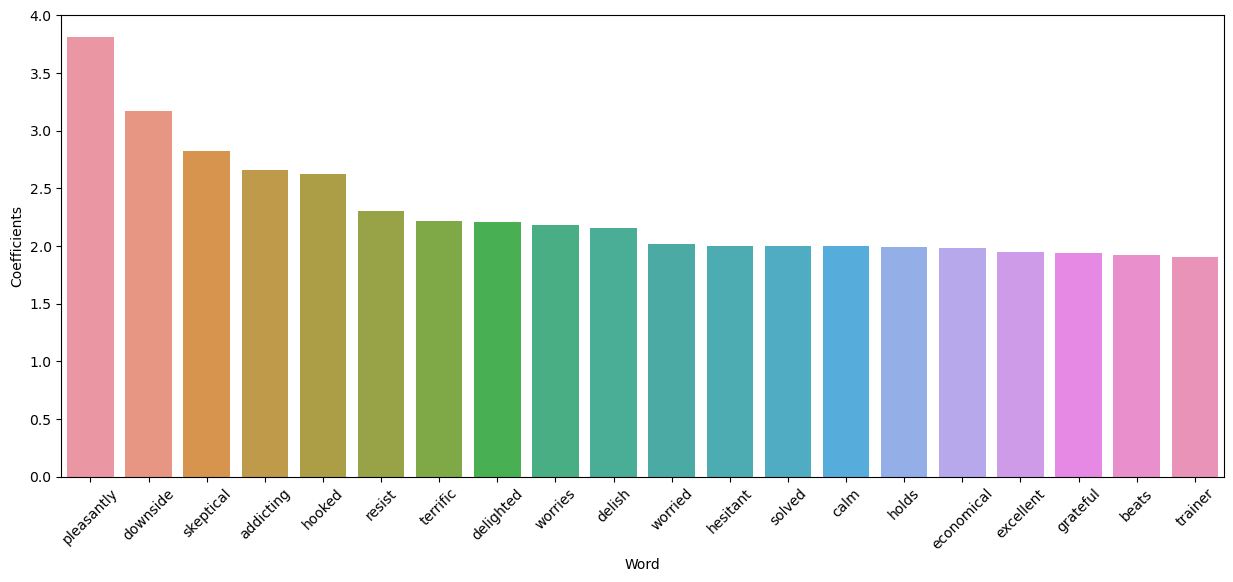

In [29]:
#Visualizing the word coefficients
plt.figure(figsize=(15, 6))
sns.barplot(x=top_20_positive['Word'], y =top_20_positive['Coefficients'])
plt.xticks(fontsize=10)
plt.xticks(rotation=45);

### Automating the tasks

In [30]:
def text_fit(X,y,nlp_model,ml_model):
    while True:
        positive_or_negative = input("Müsbət yoxsa mənfi təsir edən sözləri görmək istəyirsiniz? Müsbət üçün 1, mənfi üçün 0 qeyd edin")
        if positive_or_negative == "1" or positive_or_negative == "0":
            break
    X_count = count_matrix.fit_transform(X)
    print(f"Count of features : {X_count.shape[1]}")
    X_train, X_test, y_train, y_test = train_test_split(X_count,y)
    model = ml_model.fit(X_train,y_train)
    accuracy_score = model.score(X_test,y_test)
    print('\n')
    print(accuracy_score)
    words = count_matrix.get_feature_names_out()
    coefficients = model.coef_.tolist()[0]
    coefficient_dataframe = pd.DataFrame({"Word":words,"Coefficients":coefficients})
    sorted_df = coefficient_dataframe.sort_values(['Coefficients','Word'], ascending=False)
    print('\n')
    if positive_or_negative =="1":
        print("*******************Top 20 positive features *******************")
        print(sorted_df.head(20))
    elif positive_or_negative =="0":
        print("*******************Top 20 negative features *******************")
        print(sorted_df.tail(20))

In [31]:
#Executing and testing function
from sklearn.feature_extraction.text import CountVectorizer
count_matrix = CountVectorizer(stop_words='english')
from sklearn.linear_model import LogisticRegression
text_fit(X,y,count_matrix,LogisticRegression())

Müsbət yoxsa mənfi təsir edən sözləri görmək istəyirsiniz? Müsbət üçün 1, mənfi üçün 0 qeyd edin1
Count of features : 114969


C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(




0.9362438571667656


*******************Top 20 positive features *******************
               Word  Coefficients
80600    pleasantly      3.810045
39072      downside      3.194250
5865      addicting      2.814711
94667     skeptical      2.737443
35726        delish      2.603584
87967        resist      2.345359
39214      drawback      2.308478
78641         penny      2.280807
113138      worries      2.206245
40135       easiest      2.171798
51189      grateful      2.086039
111520      welcome      2.049112
55029        hooked      2.048231
102857     terrific      2.014494
43251   exceptional      2.004842
111911         whim      1.987732
105162      trainer      1.985199
68460           met      1.978414
87174      relaxing      1.975446
43222     excellent      1.967008


In [32]:
#creating prediction function to show confusion matrix
from sklearn.metrics import confusion_matrix,accuracy_score
def predict(X,y,nlp_model,ml_model):
    X_count = count_matrix.fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(X_count,y)
    model = ml_model.fit(X_train,y_train)
    predictions = model.predict(X_test)
    conf_mat = confusion_matrix(predictions,y_test)
    print(conf_mat)
    score = accuracy_score(predictions,y_test)
    print(f"/n Accuracy score: {score}")

In [33]:
#Executing and testing function
from sklearn.feature_extraction.text import CountVectorizer
count_matrix = CountVectorizer(stop_words='english')
from sklearn.linear_model import LogisticRegression
predict(X,y,count_matrix,LogisticRegression())

[[ 15081   2655]
 [  5579 108139]]
/n Accuracy score: 0.9373621190682673


C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


#### Trying Dummy Classifier algorithm

In [34]:
def text_fit_new(X, y, nlp_model,ml_model,coef_show=1):
    
    X_c = nlp_model.fit_transform(X)
    print('features: {}'.format(X_c.shape[1]))
    X_train, X_test, y_train, y_test = train_test_split(X_c, y)
    print(' train records: {}'.format(X_train.shape[0]))
    print(' test records: {}'.format(X_test.shape[0]))
    ml =ml_model.fit(X_train, y_train)
    acc = ml.score(X_test, y_test)
    print ('Model Accuracy: {}'.format(acc))
    
    if coef_show == 1: 
        w = nlp_model.get_feature_names()
        coef = ml.coef_.tolist()[0]
        coeff_df = pd.DataFrame({'Word' : w, 'Coefficient' : coef})
        coeff_df = coeff_df.sort_values(['Coefficient', 'Word'], ascending=[0, 1])
        print('\n')
        print('-Top 20 positive-')
        print(coeff_df.head(20).to_string(index=False))
        print('\n')
        print('-Top 20 negative-')        
        print(coeff_df.tail(20).to_string(index=False))

In [35]:
from sklearn.dummy import DummyClassifier
count_matrix = CountVectorizer(stop_words='english')

In [36]:
### calling function for dummy classifier 
text_fit_new(X, y, count_matrix, DummyClassifier(),0)

features: 114969
 train records: 394360
 test records: 131454
Model Accuracy: 0.8448126340773198


#### TF-IDF vectorizing process and implementing Logistic Regression

In [37]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf=TfidfVectorizer(stop_words='english')
lr=LogisticRegression()
text_fit_new(X, y, tfidf , lr,0)

features: 114969
 train records: 394360
 test records: 131454
Model Accuracy: 0.933839974439728


C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [38]:
predict(X,y,tfidf,lr)

[[ 15020   2772]
 [  5479 108183]]
/n Accuracy score: 0.9372327962633317


C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


**Note**: CountVectorizer simply counts the number of times a word appears in a document (using a bag-of-words approach), while TF-IDF Vectorizer takes into account not only how many times a word appears in a document but also how important that word is to the whole corpus.We got some improvement by using TFIDF Vectorizer

### Upvote prediction
>     We will be focusing on score 5 reviews, and get rid of comments with neutral votes

In [39]:
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Helpfull%,%upvote
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,1.0,80-100%
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,-1.0,NaN
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,1.0,80-100%
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,1.0,80-100%
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,-1.0,NaN


In [40]:
data = df[df['Score']==5]
data.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Helpfull%,%upvote
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,1.0,80-100%
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,-1.0,NaN
6,7,B006K2ZZ7K,A1SP2KVKFXXRU1,David C. Sullivan,0,0,5,1340150400,Great! Just as good as the expensive brands!,This saltwater taffy had great flavors and was...,-1.0,NaN
7,8,B006K2ZZ7K,A3JRGQVEQN31IQ,Pamela G. Williams,0,0,5,1336003200,"Wonderful, tasty taffy",This taffy is so good. It is very soft and ch...,-1.0,NaN
8,9,B000E7L2R4,A1MZYO9TZK0BBI,R. James,1,1,5,1322006400,Yay Barley,Right now I'm mostly just sprouting this so my...,1.0,80-100%


In [41]:
data.columns

Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text',
       'Helpfull%', '%upvote'],
      dtype='object')

In [42]:
df['%upvote'].unique()

['80-100%', NaN, '60-80%', 'Empty', '40-60%', '20-40%', '0-20%']
Categories (6, object): ['Empty' < '0-20%' < '20-40%' < '40-60%' < '60-80%' < '80-100%']

In [43]:
data2 = data[data['%upvote'].isin(['0-20%', '20-40%', '60-80%', '80-100%'])]
data2.shape

(154428, 12)

In [44]:
X = data2['Text']

In [45]:
y_dict = {'0-20%': 0, '20-40%': 0, '60-80%': 1, '80-100%': 1}
y = data2['%upvote'].map(y_dict)

In [46]:
print(y.value_counts())

1.0    151721
0.0      2707
Name: %upvote, dtype: int64


#### The target class 'y' is highly skewed , we will observe positive upvotes are too much higher than negative ones.
   

In [47]:
#TF-IDF Vectorizing process
from sklearn.feature_extraction.text import TfidfVectorizer
tf=TfidfVectorizer()

In [48]:
X_c=tf.fit_transform(X)

In [49]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_c,y,train_size=0.7)

In [50]:
y_test.value_counts()

1.0    45515
0.0      814
Name: %upvote, dtype: int64

### RandomOverSampler to handle imbalanced data
>Let's resample the data to get balanced data: 

In [51]:
#!pip install tensorflow
from imblearn.over_sampling import RandomOverSampler

In [52]:
over_s=  RandomOverSampler()

In [53]:
#Oversampling the train data
X_train_res, y_train_res = over_s.fit_resample(X_c, y)

In [54]:
#Lets show the shape of oversampled training data
X_train_res.shape,y_train_res.shape

((303442, 67507), (303442,))

In [55]:
#Lets the show count of 1 and 0 classes in the trainin data by using Counter module related to collections
from collections import Counter
print(f'Original dataset shape: {Counter(y)}')
print(f'Resampled dataset shape: {Counter(y_train_res)}')

Original dataset shape: Counter({1.0: 151721, 0.0: 2707})
Resampled dataset shape: Counter({1.0: 151721, 0.0: 151721})


### Cross Validation via GridSearchCV and Modelling the data 
>Let's resample the data to get balanced data: 

In [56]:
from sklearn.linear_model import LogisticRegression
log_class=LogisticRegression()

In [57]:
#Creating parameter grid to hyperparameter tuning
grid={'C':10.0 **np.arange(-2,3),'penalty':['l1','l2']}

In [58]:
#Creating GridSearchCV object
from sklearn.model_selection import GridSearchCV
clf=GridSearchCV(estimator=log_class,param_grid=grid,cv=5,n_jobs=-1,scoring='f1_macro')
clf.fit(X_train_res,y_train_res)

C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
25 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 54, in _check_solver
    raise ValueError(
ValueErro

GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02]),
                         'penalty': ['l1', 'l2']},
             scoring='f1_macro')

In [59]:
#Show tuned model accuracy
y_pred=clf.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))

[[  814     0]
 [  813 44702]]
0.9824515961924497
